# <center> Binary Star System Numerical Modelling and Simulation

This jupyter notebook is presented as report on the modelling of a binary star system using numerical computing.

The binary star system will consist of a G and K class stars. It can be
shown, without loss of generality, that a two-body problem is always evolving in a two-
dimensional orbital plane. The force that drives the motion of the two stars in this model
is the gravitational force.
Therefore, the force of an object of mass M at location (xM , yM ) acting on another
object of mass m at location (xm , ym ) is given by the following two formulae (one for each2
coordinate, x and y):

$$ F_x = G \left ( \frac{M \cdot m}{R^2} \right ) \frac{r_x}{R} $$
$$ F_y = G \left ( \frac{M \cdot m}{R^2} \right ) \frac{r_y}{R} $$

where G = 6.67408 × 10−11 m3 kg−1 s−2 is the gravitational constant, R is the distance
between each objects given as:

\begin{equation} R = \sqrt{r^2_x + r^2_y}  \end{equation}
 
and r<sub>x</sub> = x<sub>M</sub> − x<sub>m</sub> and r<sub>y</sub>= y<sub>M</sub> − y<sub>m</sub> , the signed relative positions between the two objects.
The acceleration resulting from this force acting on object m at location (x<sub>m</sub> , y<sub>m</sub> ) is then
given by

\begin{equation} a_x = \frac{dv_x}{dt} = G \left ( \frac{M}{R^2} \right ) \frac{r_x}{R} \end{equation}

\begin{equation} a_y = \frac{dv_y}{dt} = G \left ( \frac{M}{R^2} \right ) \frac{r_y}{R} \end{equation}

Integrating equations 2 and 3 gives us the velocity of star with mass m which we can use to the change in position given by:

\begin{equation} x(t) ≈ x_0 + v_x (t) · \Delta t \end{equation}

\begin{equation} y(t) ≈ y_0 + v_y (t) · \Delta t \end{equation}

derived from $v = \frac{dx}{dt}$

For the purpose of this report we will use the odeint() differential equation solver from the scipy module

In [354]:
# First we import the modules we will use
# we use matplotlib and its associtaed modules for plotting figures
# numpy makes available to useful math operations and objects such as vector arrays
# scipy has mentioned before will provide the differential equation solver
# and finally pandas will be used to store our results in a table

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci

#Import matplotlib and associated modules for 3D and animations
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
#Turn off package update warnings
import warnings
warnings.filterwarnings('ignore')

In [355]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2

# To make use of the scipy.integrate.odeint() differential solver we must work with non-dimensional
# equations, to achieve this we will write this program relative to the stars in Alpha Centuri

#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri

#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Data frame that will store results

results_df = pd.DataFrame()

The initial conditions of the system are given in the table below


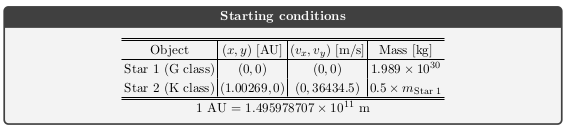


In [356]:
# Intialize the intial conditions of the system

#Define mass in terms of solar mass
m1=1 # G Class Star
m2=0.5 # K Class Star

#Define initial position vectors
r1=[0,0] 
r2=[1.00269,0] 

#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

#Define initial velocities
v1=[0.00,0.00] 
v2=[-0.0,-0.08] 

#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [357]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:2]
    r2=w[2:4]
    v1=w[4:6]
    v2=w[6:8]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    # Define the chnage in velocity equation
    dv1_dt=K1*m2*(r2-r1)/r**3 
    dv2_dt=K1*m1*(r1-r2)/r**3
    
    # Define the change in position vector
    dr1_dt=K2*v1
    dr2_dt=K2*v2
    
    # compute derivatives
    r_derivs=sci.concatenate((dr1_dt,dr2_dt))
    derivs=sci.concatenate((r_derivs,dv1_dt,dv2_dt))
    return derivs

In [358]:
#Package initial parameters
init_params=sci.array([r1,r2,v1,v2]) #create array of initial params
init_params=init_params.flatten() #flatten array to make it 1D
time_span=sci.linspace(0,8,1000) #8 orbital periods and 500 points

#Run the ODE solver
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [359]:
# Assign the postion and vector solution variables

r1_sol=two_body_sol[:,:2]
r2_sol=two_body_sol[:,2:4]
v1_sol=two_body_sol[:,4:6]
v2_sol=two_body_sol[:,6:8]

# add solution to dataframe containing the results:

# G Star pos
results_df['star1_x_pos'] = r1_sol[:,0]
results_df['star1_y_pos'] = r1_sol[:,1]
#star1 velocity
results_df['star1_x_vel'] = v1_sol[:,0]
results_df['star1_y_vel'] = v1_sol[:,1]

# star2 pos
results_df['star2_x_pos'] = r2_sol[:,0]
results_df['star2_y_pos'] = r2_sol[:,1]
#star2_ velocity
results_df['star2_x_vel'] = v2_sol[:,0]
results_df['star2_y_vel'] = v2_sol[:,1]
print('First five rows of the results dataframe:')
results_df.head()

First five rows of the results dataframe:


,star1_x_pos,star1_y_pos,star1_x_vel,star1_y_vel,star2_x_pos,star2_y_pos,star2_x_vel,star2_y_vel
0,0.000000,0.000000e+00,0.000000,0.000000,1.002690,0.000000,-0.000000,-0.080000
1,0.000023,-4.091845e-08,0.000798,-0.000002,1.002644,-0.004638,-0.001597,-0.079996
2,0.000093,-2.915377e-07,0.001597,-0.000007,1.002505,-0.009275,-0.003194,-0.079985
3,0.000208,-9.589028e-07,0.002396,-0.000017,1.002273,-0.013911,-0.004792,-0.079967
4,0.000370,-2.279132e-06,0.003196,-0.000030,1.001949,-0.018547,-0.006391,-0.079941


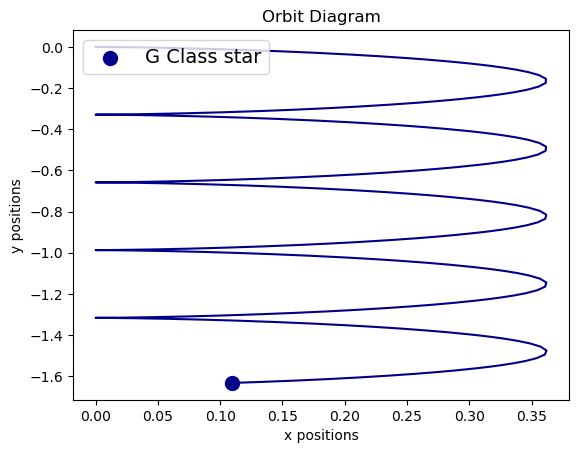

In [360]:
plt.plot(r1_sol[:,0],r1_sol[:,1],color="darkblue")
plt.scatter(r1_sol[-1,0],r1_sol[-1,1],color="darkblue",marker="o",s=100,label="G Class star")
plt.xlabel('x positions')
plt.ylabel('y positions')
plt.title('Orbit Diagram')
plt.legend(loc="upper left",fontsize=14)
plt.show()

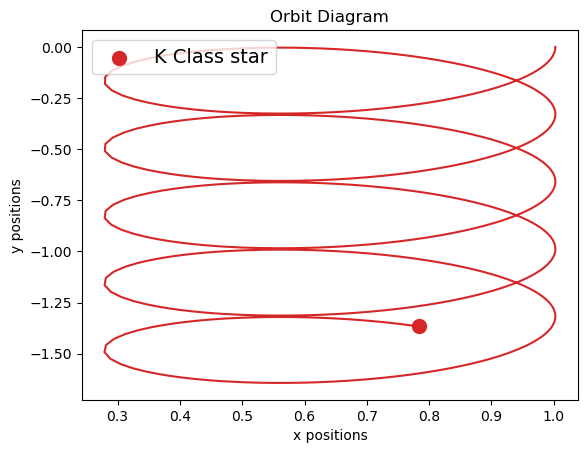

In [361]:
plt.plot(r2_sol[:,0],r2_sol[:,1],color="tab:red")
plt.scatter(r2_sol[-1,0],r2_sol[-1,1],color="tab:red",marker="o",s=100,label="K Class star")
plt.xlabel('x positions')
plt.ylabel('y positions')
plt.title('Orbit Diagram')
plt.legend(loc="upper left",fontsize=14)
plt.show()

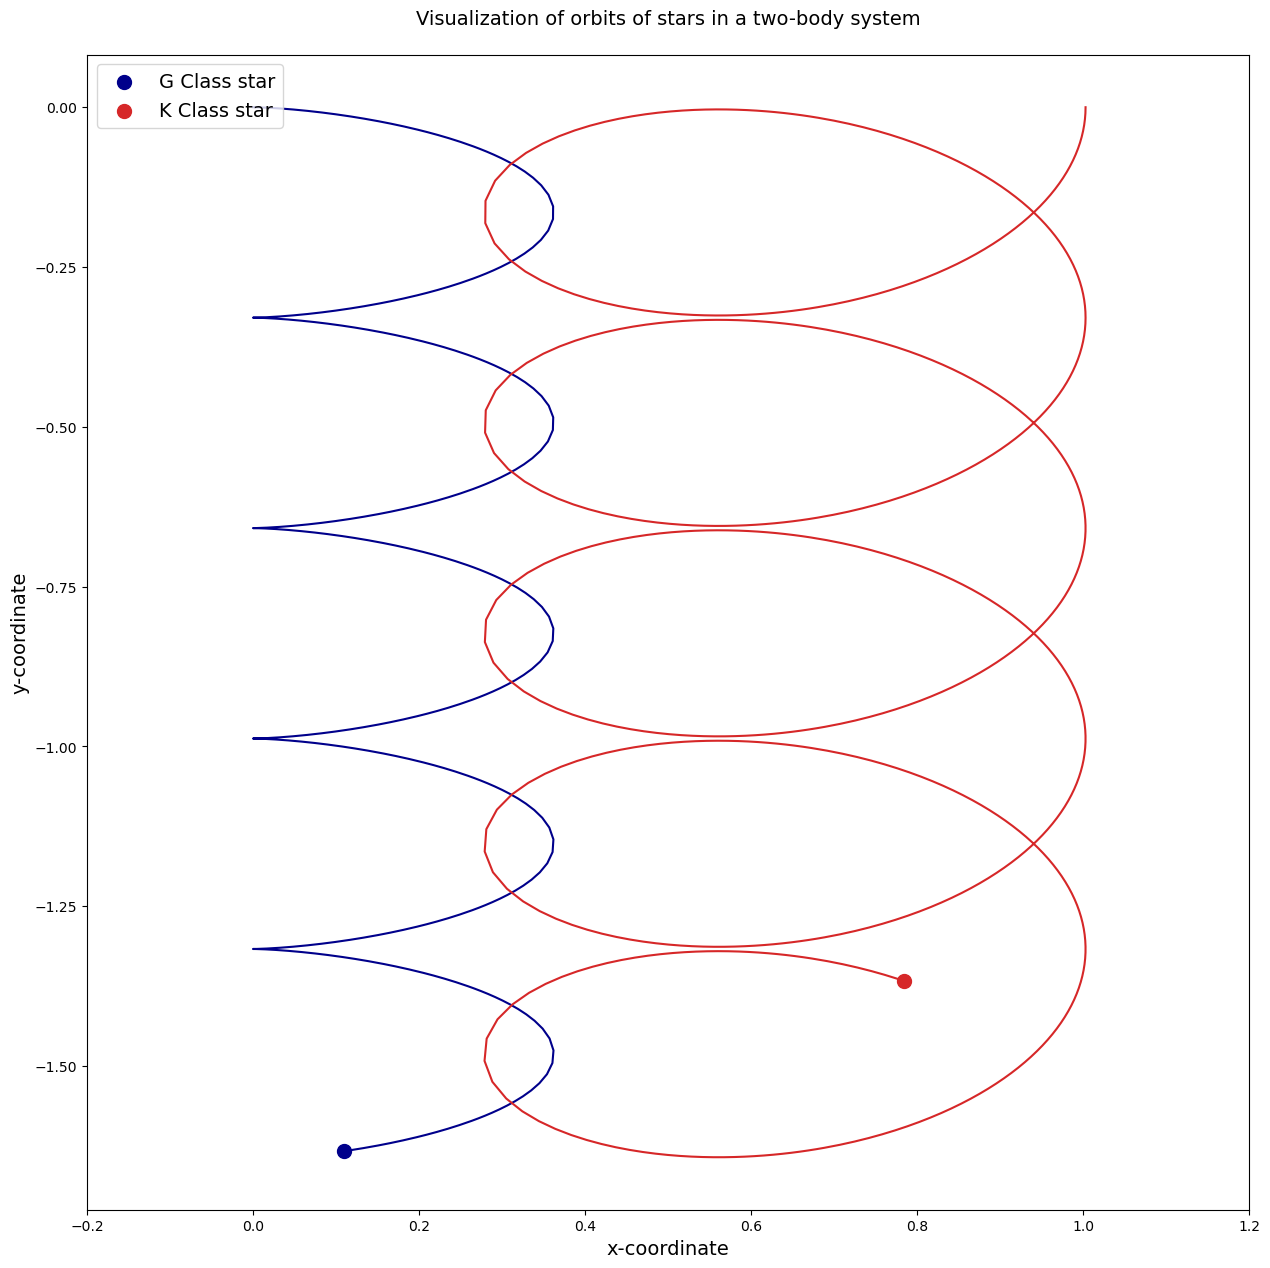

In [362]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1_com=r1_sol-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2_com=r2_sol-rcom_sol


#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111)
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],color="tab:red")
ax.set_xlim(-0.2,1.2)

#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],color="darkblue",marker="o",s=100,label="G Class star")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],color="tab:red",marker="o",s=100,label="K Class star")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
#ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

From the orbit plots above we observe that the entire system is moving in the -y direction. Which is in the direction of the initial velocity that we gave the K class star and therfore intiates some velocity for the center of mass.

The K class star shows a stable orbit exibiting a elliptical orbit through space but the G class star does not show a stable. Infact it appears to only complete half an orbit before being pulled back towards to the K class star

After finding the positions of the stars throughout their orbit we can the compute the gravitational force they experience in component form which then allows us ti find the magnitude of the force at every iteration as accomplished in the cell below

In [363]:
# calculate the gravitational force between the stars
F = np.array([])
f_x = []
f_y = []
dist_mag = []
force_total = []
for i in range(1000):

    pos_x1, pos_y1 =  r1_sol[:,0][i], r1_sol[:,1][i] 
    pos_x2, pos_y2 =  r2_sol[:,0][i], r2_sol[:,1][i] 
    rx = pos_x2 - pos_x1
    ry = pos_y2 - pos_y1
    R = np.sqrt(rx**2 + ry**2)
    force_x = ((K1*m1*m2)/(R**2))*(rx/R)
    force_y = ((K1*m1*m2)/(R**2))*(ry/R)
    force_tot = np.sqrt(force_x**2 + force_y**2)
    f_x.append(force_x)
    f_y.append(force_y)
    force_total.append(force_tot)
    dist_mag.append(R)
    
    
F = [list(tup) for tup in zip(f_x,f_y)]
F = np.array(F)

#add force to dataframe
results_df['Distance_mag'] = dist_mag
results_df['force_x'] = F[:,0]
results_df['force_y'] = F[:,1]
results_df['total force'] = force_total
print(f'The average gravtitational force between the stars is {np.mean(force_total):.3f}')
results_df.head()

The average gravtitational force between the stars is 0.669


,star1_x_pos,star1_y_pos,star1_x_vel,star1_y_vel,star2_x_pos,star2_y_pos,star2_x_vel,star2_y_vel,Distance_mag,force_x,force_y,total force
0,0.000000,0.000000e+00,0.000000,0.000000,1.002690,0.000000,-0.000000,-0.080000,1.002690,0.099705,0.000000,0.099705
1,0.000023,-4.091845e-08,0.000798,-0.000002,1.002644,-0.004638,-0.001597,-0.079996,1.002631,0.099716,-0.000461,0.099717
2,0.000093,-2.915377e-07,0.001597,-0.000007,1.002505,-0.009275,-0.003194,-0.079985,1.002455,0.099748,-0.000923,0.099752
3,0.000208,-9.589028e-07,0.002396,-0.000017,1.002273,-0.013911,-0.004792,-0.079967,1.002162,0.099801,-0.001385,0.099810
4,0.000370,-2.279132e-06,0.003196,-0.000030,1.001949,-0.018547,-0.006391,-0.079941,1.001750,0.099875,-0.001849,0.099892


In SI units the force between the stars is $ 5.94 \times 10^{27}N $ in our non-dimensional data this transalates to a force of 0.099705. Using this conversion we find that the average force as computed above gives a value of

$$ F_{avg} = 4 \times 10^{28} N $$ 

In [364]:
np.mean(dist_mag)

0.7260613820321626

In [365]:

# #Create figure
# fig=plt.figure(figsize=(15,15))
# #Create 3D axes
# ax=fig.add_subplot(111, projection='3d')
# #Plot the orbits
# ax.plot(r1_com[:,0],r1_sol[:,1],color="darkblue")
# ax.plot(r2_com[:,0],r2_sol[:,1],color="tab:red")

# #Plot the final positions of the stars
# ax.scatter(r1_com[-1,0],r1_sol[-1,1],color="darkblue",marker="o",s=100,label="G Class star")
# ax.scatter(r2_com[-1,0],r2_sol[-1,1],color="tab:red",marker="o",s=100,label="K Class star")
# #Add a few more bells and whistles
# ax.set_xlabel("x-coordinate",fontsize=14)
# ax.set_ylabel("y-coordinate",fontsize=14)
# #ax.set_zlabel("z-coordinate",fontsize=14)
# ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
# ax.legend(loc="upper left",fontsize=14)


(7.0, 510.0)

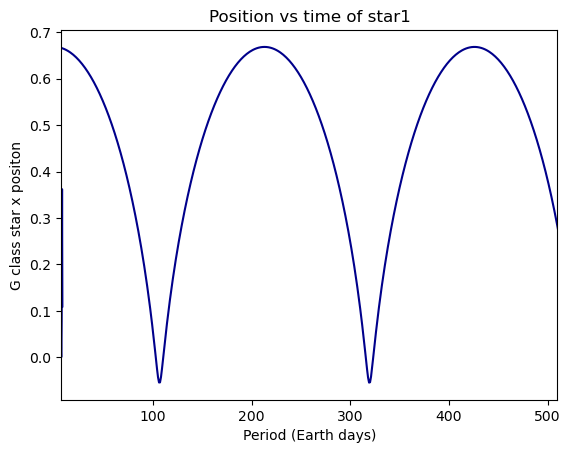

In [366]:
plt.plot(time_span,r1_sol[:,0],r2_com[:,0],color="darkblue")
plt.xlabel('Period (Earth days)')
plt.ylabel('x positon')
plt.title('G class star Position vs time of star1')
plt.xlim(7,510)

(7.0, 510.0)

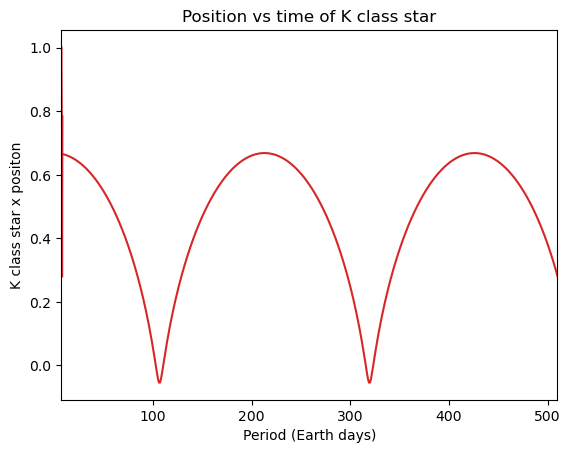

In [367]:
plt.plot(time_span,r2_sol[:,0],r2_com[:,0],color="tab:red")
plt.xlabel('Period (Earth days)')
plt.ylabel('x positon')
plt.title('K class star Position vs time of K class star')
plt.xlim(7,510)


From the position time plots shown above it can be concluded that th period of the binary star system is approxinately 220 Earth days

An analytical solution can be found by using Keplers third law of planetary motion given by

$$ \bar{p}^2 = \frac{4\pi^2}{G(m_1 + m_2)} \bar{a}^3 $$

where $\bar{p}$ is the average orbital period and $ \bar{a} $ is the average seperation of the stars over the orbit.

We have already calculated the seperation of the stars throughout the orbit. The average seperation of the stars is 0.726 AU = $ 1.082 \times 10^{11} m$

This yields a period of $\bar{p} = 1.584 \times 10^7 $ which is 182.28 Earth days

## Conclusion

In our binary star system consisting of a G class star and K class star we have employed a numerical method of solving the equations of motion, assisted by scipy's odeint differential equation solver. We established that only the K class star exhibits a stable orbit around the center of mass of the system whilst the G class star only completes half an orbit before being pulled back towards the center of mass. The average magnitude of this gravitational force was found to $F_{avg} = 4 \times 10^{28} N $.

We also plotted position-time plots for the x-axis of both stars and deduced an orbital period of about 220 Earth days. This is inconsistent with the analytical period which was computed to be about 185 days, providing an error of about 18%.
